**Nonlinear Differential Equations and Root Finding**

In [18]:
# find root of f(x) = 1 + x - x^4
import numpy as np
import matplotlib.pyplot as plt

def calcr(x):   
    return calcr_all(x, calc_r=True)
  
def calcdrdx(x):   
    return calcr_all(x, calc_drdx=True)

def calcr_all(x, calc_r=False, calc_drdx=False):
    """
    Calculate r and dr/dx

    Args:

    x: NumPy 1D array

    calc_r: boolean.
            If True, then calculate r(x)

    calc_drdx: boolean.
            If True, then calculate dr/dx(x)

    Returns:
        if calc_r and calc_drdx: return tuple (r, r_x)
        else return just r or just r_x
    """
    
    # Calculate r if requested
    if calc_r:
        # Simple r(x) example
        r = 1 + x - x**4
        
        # Uncomment the following for more complex demo
        # r = -3*x**3 + 7*x**2 - 4.

    # Calculate dr/dx if requested
    if calc_drdx:
        # drdx for simple r(x)
        r_x = 1 - 4*x**3
        
        # Uncomment the following for more complex demo
        # r_x = -9*x**2 + 14*x

    if calc_r and calc_drdx:
        return (r, r_x)
    elif calc_r:
        return r
    elif calc_drdx:
        return r_x
    else:
        raise ValueError("calc_r and calc_drdx both False")


def findroot_bisection(calc_r, a, b, n, ax=None):
    """
        Runs the bisection method for finding an approximation to a root
        of r(x) = 0

        Args:
            calc_r (scalar function reference): function which returns r(x) 
            when called as calc_r(x)
            
            a, b (float): numbers such that r(a)*r(b) < 0            
    		(i.e., r(a) and r(b) have opposite signs)
            
            n (int): number of iterations to take
            
            ax (matplotlib pyplot Axes object reference): if provided,
            the plot the locations in the x, r(x) plane for the current 
            bisection interval values of a, m, and b.
                
        Returns:
            x: approximation to a root of r, i.e., such that r(x) = 0
        """

    ra = calc_r(a)
    rb = calc_r(b)
    assert ra*rb < 0.0, "The bisection method needs an interval where the function changes sign"

    m = 0.5*(a+b)
    print(f"Iteration {0:2d}: x = {m: .10f}")
    for i in range(n):
            
        rm = calc_r(m)
        if (ax is not None):
            ax.plot(a,ra, marker='o', fillstyle='none', color='green', markersize=10)
            ax.plot(m,rm,'r*')
            ax.plot(b,rb, marker='o', fillstyle='none', color='blue', markersize=10)
            plt.pause(1.0)

        rma = rm*ra
        if rma > 0:    # ra and rm have the same sign, so a is replaced by m
            a  = m
            ra = rm
        elif rma < 0:  # rb and rm have the same sign, so b is replaced by m
            b  = m
            rb = rm
        else:          # only possible when r(m) == 0
            return m

        m = 0.5*(a+b)
        print(f"Iteration {i+1:2d}: x = {m: .10f}")
    
    if (ax is not None): # Plot location of final iterate
        ax.plot(a,ra, marker='o', fillstyle='none', color='green', markersize=10)
        ax.plot(m,calc_r(m),'m*')
        ax.plot(b,rb, marker='o', fillstyle='none', color='blue', markersize=10)

    
    return m


def findroot_Newton(calc_r, calc_drdx, x0, n, eps=None, ax=None):
    """
        Runs the Newton-Raphson method for finding an approximation to a root of r

        Args:
            calc_r (scalar function reference): function which returns r(x) 
                when called as calc_r(x)
                
            calc_drdx (scalar function reference): function which returns dr/dx(x) 
                when called as calc_drdx(x)

            x0 (float): initial guess of x

            n (int): number of iterations to take
            
            eps (float): if provided, use finite difference with a step size of 
            eps to calculate drdx (instead of calc_drdx) with finite difference method
            
            ax (matplotlib pyplot Axes object reference): if provided,
            the plot the locations in the xk, r(xk) plane for each
            Newton iterate
                
        Returns:
            x: approximation to a root of f, i.e., such that r(x) = 0

        """
    
    def fd_drdx(xk):  # Approximate the derivative with finite difference (fd) method.
        return (calc_r(xk+eps)-calc_r(xk-eps))/(2*eps)
    
    if (eps is not None):
        calc_drdx = fd_drdx

    xk = x0
    print(f"Iteration {0:2d}: x = {xk: .10f}")
    for i in range(n):
        rk = calc_r(xk)

        if (ax is not None): # Plot location of current iterate
            ax.plot(xk, rk, 'r*')
            plt.pause(1.0)

        drdxk = calc_drdx(xk)            
        xk = xk - rk/drdxk
        
        print(f"Iteration {i+1:2d}: x = {xk: .10f}")

    if (ax is not None): # Plot location of final iterate
        ax.plot(xk, calc_r(xk), 'm*')

    return xk

In [19]:
findroot_Newton(calcr, calcdrdx, 1, 5)

Iteration  0: x =  1.0000000000
Iteration  1: x =  1.3333333333
Iteration  2: x =  1.2358078603
Iteration  3: x =  1.2210589943
Iteration  4: x =  1.2207442258
Iteration  5: x =  1.2207440846


1.220744084605788

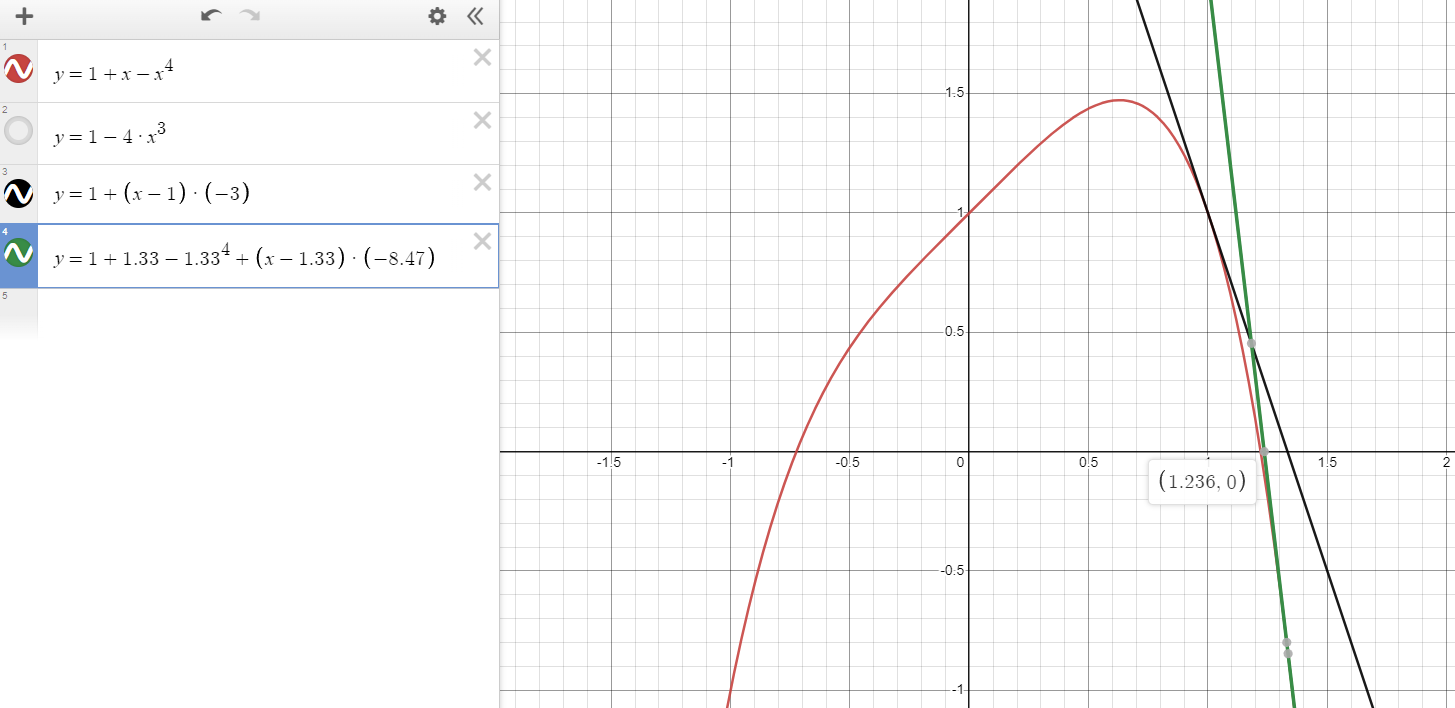

$x$ converges to a root near $x^1$

In [20]:
# Find root of f(u) = -sin(2*pi*u)*exp{-u}
import numpy as np
import matplotlib.pyplot as plt

def calcr(x):   
    return calcr_all(x, calc_r=True)
  
def calcdrdx(x):   
    return calcr_all(x, calc_drdx=True)

def calcr_all(x, calc_r=False, calc_drdx=False):
    """
    Calculate r and dr/dx

    Args:

    x: NumPy 1D array

    calc_r: boolean.
            If True, then calculate r(x)

    calc_drdx: boolean.
            If True, then calculate dr/dx(x)

    Returns:
        if calc_r and calc_drdx: return tuple (r, r_x)
        else return just r or just r_x
    """
    
    # Calculate r if requested
    if calc_r:
        # Simple r(x) example
        r = -np.sin(2*np.pi*x)*np.exp(-x)
        
        # Uncomment the following for more complex demo
        # r = -3*x**3 + 7*x**2 - 4.

    # Calculate dr/dx if requested
    if calc_drdx:
        # drdx for simple r(x)
        r_x = np.exp(-x)*(np.sin(2*np.pi*x) - 2*np.pi*np.cos(2*np.pi*x))
        
        # Uncomment the following for more complex demo
        # r_x = -9*x**2 + 14*x

    if calc_r and calc_drdx:
        return (r, r_x)
    elif calc_r:
        return r
    elif calc_drdx:
        return r_x
    else:
        raise ValueError("calc_r and calc_drdx both False")


def findroot_bisection(calc_r, a, b, n, ax=None):
    """
        Runs the bisection method for finding an approximation to a root
        of r(x) = 0

        Args:
            calc_r (scalar function reference): function which returns r(x) 
            when called as calc_r(x)
            
            a, b (float): numbers such that r(a)*r(b) < 0            
    		(i.e., r(a) and r(b) have opposite signs)
            
            n (int): number of iterations to take
            
            ax (matplotlib pyplot Axes object reference): if provided,
            the plot the locations in the x, r(x) plane for the current 
            bisection interval values of a, m, and b.
                
        Returns:
            x: approximation to a root of r, i.e., such that r(x) = 0
        """

    ra = calc_r(a)
    rb = calc_r(b)
    assert ra*rb < 0.0, "The bisection method needs an interval where the function changes sign"

    m = 0.5*(a+b)
    print(f"Iteration {0:2d}: x = {m: .10f}")
    for i in range(n):
            
        rm = calc_r(m)
        if (ax is not None):
            ax.plot(a,ra, marker='o', fillstyle='none', color='green', markersize=10)
            ax.plot(m,rm,'r*')
            ax.plot(b,rb, marker='o', fillstyle='none', color='blue', markersize=10)
            plt.pause(1.0)

        rma = rm*ra
        if rma > 0:    # ra and rm have the same sign, so a is replaced by m
            a  = m
            ra = rm
        elif rma < 0:  # rb and rm have the same sign, so b is replaced by m
            b  = m
            rb = rm
        else:          # only possible when r(m) == 0
            return m

        m = 0.5*(a+b)
        print(f"Iteration {i+1:2d}: x = {m: .10f}")
    
    if (ax is not None): # Plot location of final iterate
        ax.plot(a,ra, marker='o', fillstyle='none', color='green', markersize=10)
        ax.plot(m,calc_r(m),'m*')
        ax.plot(b,rb, marker='o', fillstyle='none', color='blue', markersize=10)

    
    return m


def findroot_Newton(calc_r, calc_drdx, x0, n, eps=None, ax=None):
    """
        Runs the Newton-Raphson method for finding an approximation to a root of r

        Args:
            calc_r (scalar function reference): function which returns r(x) 
                when called as calc_r(x)
                
            calc_drdx (scalar function reference): function which returns dr/dx(x) 
                when called as calc_drdx(x)

            x0 (float): initial guess of x

            n (int): number of iterations to take
            
            eps (float): if provided, use finite difference with a step size of 
            eps to calculate drdx (instead of calc_drdx) with finite difference method
            
            ax (matplotlib pyplot Axes object reference): if provided,
            the plot the locations in the xk, r(xk) plane for each
            Newton iterate
                
        Returns:
            x: approximation to a root of f, i.e., such that r(x) = 0

        """
    
    def fd_drdx(xk):  # Approximate the derivative with finite difference (fd) method.
        return (calc_r(xk+eps)-calc_r(xk-eps))/(2*eps)
    
    if (eps is not None):
        calc_drdx = fd_drdx

    xk = x0
    print(f"Iteration {0:2d}: x = {xk: .10f}")
    for i in range(n):
        rk = calc_r(xk)

        if (ax is not None): # Plot location of current iterate
            ax.plot(xk, rk, 'r*')
            plt.pause(1.0)

        drdxk = calc_drdx(xk)            
        xk = xk - rk/drdxk
        
        print(f"Iteration {i+1:2d}: x = {xk: .10f}")

    if (ax is not None): # Plot location of final iterate
        ax.plot(xk, calc_r(xk), 'm*')

    return xk

In [22]:
findroot_Newton(calcr, calcdrdx, 0.4, 10)  # x0 = 0.4

Iteration  0: x =  0.4000000000
Iteration  1: x =  0.5036477514
Iteration  2: x =  0.4999860016
Iteration  3: x =  0.4999999998
Iteration  4: x =  0.5000000000
Iteration  5: x =  0.5000000000
Iteration  6: x =  0.5000000000
Iteration  7: x =  0.5000000000
Iteration  8: x =  0.5000000000
Iteration  9: x =  0.5000000000
Iteration 10: x =  0.5000000000


0.5

In [24]:
findroot_Newton(calcr, calcdrdx, 0.6, 10)  # x0 = 0.6

Iteration  0: x =  0.6000000000
Iteration  1: x =  0.4692479332
Iteration  2: x =  0.4994480563
Iteration  3: x =  0.4999996977
Iteration  4: x =  0.5000000000
Iteration  5: x =  0.5000000000
Iteration  6: x =  0.5000000000
Iteration  7: x =  0.5000000000
Iteration  8: x =  0.5000000000
Iteration  9: x =  0.5000000000
Iteration 10: x =  0.5000000000


0.5

In [26]:
findroot_Newton(calcr, calcdrdx, 0.9, 10)  # x0 = 0.9

Iteration  0: x =  0.9000000000
Iteration  1: x =  1.0036477514
Iteration  2: x =  0.9999860016
Iteration  3: x =  0.9999999998
Iteration  4: x =  1.0000000000
Iteration  5: x =  1.0000000000
Iteration  6: x =  1.0000000000
Iteration  7: x =  1.0000000000
Iteration  8: x =  1.0000000000
Iteration  9: x =  1.0000000000
Iteration 10: x =  1.0000000000


1.0

In [41]:
def dudt_353(x):
    dudt = -np.sin(2*np.pi*x)*np.exp(-x)
    return dudt

def ForwardEuler_FE(un, dudt, dt):
    """takes one step forward with Forward Euler method.
    u_n -> u_n+1

    Args:
        u (float): initial scalar condition
        dudt (function): calculates derivative of u.
        dt (float): timestep
    """
    un1 = un + dt*dudt(un)
    return un1

[0.9, 0.9002389756500251, 0.9004774001610439, 0.9007152745174387, 0.9009525997047017, 0.9011893767094037, 0.9014256065191634, 0.9016612901226165, 0.9018964285093856, 0.9021310226700493, 0.9023650735961133, 0.90259858227998, 0.9028315497149193, 0.9030639768950394, 0.903295864815258, 0.9035272144712737, 0.9037580268595373, 0.9039883029772239, 0.9042180438222046, 0.9044472503930194, 0.9046759236888493, 0.9049040647094891, 0.9051316744553208, 0.9053587539272865, 0.905585304126862, 0.9058113260560308, 0.9060368207172576, 0.9062617891134629, 0.9064862322479973, 0.9067101511246163, 0.9069335467474549, 0.907156420121003, 0.9073787722500806, 0.9076006041398136, 0.9078219167956094, 0.9080427112231328, 0.9082629884282828, 0.9084827494171681, 0.908701995196085, 0.908920726771493, 0.9091389451499933, 0.9093566513383047, 0.9095738463432423, 0.9097905311716947, 0.910006706830602, 0.9102223743269341, 0.910437534667669, 0.9106521888597714, 0.9108663379101716, 0.9110799828257443, 0.911293124613288, 0.91

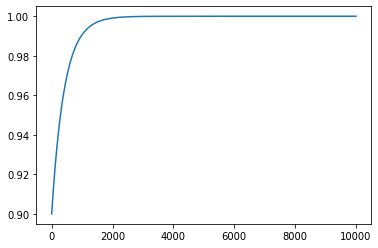

In [43]:
n = 10000
un = 0.9
dt = 0.001

un1_list = [un]
for i in range(n):
    un1 = ForwardEuler_FE(un, dudt_353, dt)
    un1_list.append(un1)
    un = un1

print(un1_list)
fig, ax = plt.subplots()
ax.plot(un1_list)